In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import joblib

import numpy as np

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"sales .csv")

C:\Users\am790\AppData\Local\Temp\ipykernel_9480\3492790858.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\am790\OneDrive\Desktop\analytic\data\sales .csv")


In [9]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_percentage', 'discount_amount', 'total',
       'category', 'payment_method', 'bi_st', 'cust_id', 'year', 'month',
       'ref_num', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'age', 'full_name', 'E Mail', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             286392 non-null  object 
 1   order_date           286392 non-null  object 
 2   status               286392 non-null  object 
 3   item_id              286392 non-null  int64  
 4   sku                  286392 non-null  object 
 5   qty_ordered          286392 non-null  int64  
 6   price                286392 non-null  float64
 7   value                286392 non-null  float64
 8   discount_percentage  286392 non-null  object 
 9   discount_amount      286392 non-null  float64
 10  total                286392 non-null  float64
 11  category             286392 non-null  object 
 12  payment_method       286392 non-null  object 
 13  bi_st                286392 non-null  object 
 14  cust_id              286392 non-null  int64  
 15  year             

In [3]:
del(df['item_id'])
del(df['year'])
del(df['month'])
del(df['ref_num'])
del(df['Name Prefix'])
del(df['First Name'])
del(df['Middle Initial'])
del(df['Last Name'])
del(df['E Mail'])
del(df['Phone No. '])
del(df['Place Name'])
del(df['Zip'])
del(df['Region'])
del(df['User Name'])
del(df['SSN'])
del(df['order_id'])
del(df['cust_id'])

df = df[df["price"] >= 1]

df['order_date'] = pd.to_datetime(df['order_date'])
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: float(x) )
df['deserve_disc'] = df['discount_amount'].apply(lambda x: False if x == 0 else True)

#-----date encode--------#

def date_encode(x):

    return x.month

df['month'] = df['order_date'].apply(lambda x: date_encode(x) ) 

#-------------group each age interval-----------#

def map_age_to_group(age):

    if( 0 < age and age <=18 ):
        return "youth"
    elif(18 < age and age <=40):
        return "middle"
    else:
        return "old"

df['age_group'] = df['age'].apply(map_age_to_group)

def age_encode(x):

    if(x == "youth"):

        return 0

    elif(x=="middle"):

        return 1

    elif(x=="old"):

        return 2


df['age_group_enc'] = df['age_group'].apply(age_encode)


#----------encoding category-------------

Category_encoder = LabelEncoder()
df['category_enc'] = Category_encoder.fit_transform(df['category'])
joblib.dump(Category_encoder, 'codCat.pkl')

#----------encoding state_name-----------

label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['State'])
joblib.dump(label_encoder, 'codState.pkl')

#---------encoding payment method--------

Mencoder = LabelEncoder()
df['pay_encoded'] = Mencoder.fit_transform(df['payment_method'])
joblib.dump(Mencoder, 'codPayment.pkl')

['codPayment.pkl']

In [12]:
df.describe()

,order_date,qty_ordered,price,value,discount_percentage,discount_amount,total,age,month,age_group_enc,category_enc,state_encoded,pay_encoded
count,283562,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000,283562.000000
mean,2021-03-12 08:28:28.527941120,2.980244,859.881520,1754.594897,0.036300,70.738337,1683.856560,46.529299,7.372910,1.580321,7.396322,25.145263,4.135882
min,2020-10-01 00:00:00,1.000000,1.000000,2.000000,0.000000,0.000000,1.982000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-12-24 00:00:00,2.000000,50.000000,129.800000,0.000000,0.000000,125.000000,32.000000,4.000000,1.000000,4.000000,13.000000,1.000000
50%,2021-03-15 00:00:00,2.000000,120.000000,340.000000,0.000000,0.000000,324.000000,47.000000,7.000000,2.000000,8.000000,24.000000,6.000000
75%,2021-05-18 00:00:00,3.000000,963.500000,2010.000000,0.060000,19.960000,1979.200000,61.000000,12.000000,2.000000,10.000000,38.000000,6.000000
max,2021-09-30 00:00:00,371.000000,101262.590000,202525.180000,0.680000,30213.150000,202525.180000,75.000000,12.000000,2.000000,14.000000,50.000000,12.000000
std,NaN,3.801886,1748.332753,3601.440539,0.075001,258.063787,3519.531956,16.663521,3.838584,0.530807,4.274899,14.550035,3.142717


In [4]:
def gen_encode(x):

    if(x == "F"):

        return 0

    elif(x=="M"):

        return 1



df['gender_enc'] = df['Gender'].apply(gen_encode)

In [5]:
mean = df["value"].mean()
std_dev = df["value"].std()

# Calculate z-scores for each data point
df["z-score"] = (df["value"] - mean) / std_dev

# Set threshold
threshold = 3

# Find outliers
df = df[ abs(df["z-score"]) < threshold]



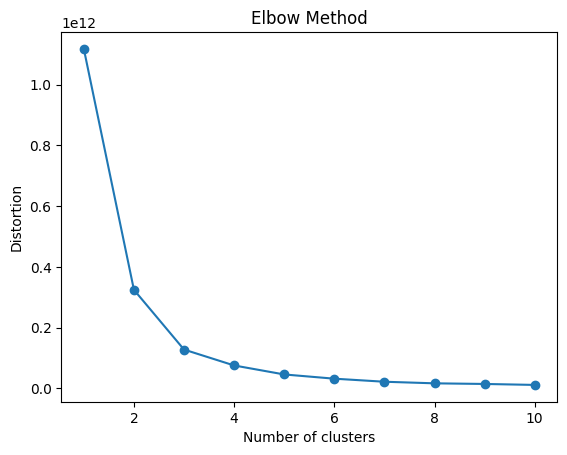

In [6]:
#------------clustring step on values---------
# Select features for clustering
features = ['value']

# Extract the features
X = df[features]

# Elbow method to find the optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score

features = ['category_enc', 'gender_enc', 'pay_encoded', 'state_encoded', 'age_group_enc', 'month', 'value']

# Extract the features
X = df[features]

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Assuming you have ground truth labels in df['true_labels']
# Replace 'true_labels' with the actual column name containing your ground truth labels
true_labels = df['deserve_disc']

# Compute Bcubed precision
precision = precision_score(true_labels, clusters, average='macro')

# Compute Bcubed recall
recall = recall_score(true_labels, clusters, average='macro')

print("Bcubed Precision:", precision)
print("Bcubed Recall:", recall)


Bcubed Precision: 0.6385612689607546
Bcubed Recall: 0.588762211303506


In [8]:
df['cluster'] = clusters


In [18]:
df.columns

Index(['order_date', 'status', 'sku', 'qty_ordered', 'price', 'value',
       'discount_percentage', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'Gender', 'age', 'full_name', 'County',
       'City', 'State', 'deserve_disc', 'month', 'age_group', 'age_group_enc',
       'category_enc', 'state_encoded', 'pay_encoded', 'gender_enc', 'z-score',
       'cluster'],
      dtype='object')

In [10]:
    joblib.dump(kmeans, 'modCluster.pkl')

['modCluster.pkl']

In [19]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Splitting features and target variable
X = df[['category_enc', 'gender_enc','pay_encoded', 'state_encoded', 'age_group_enc','month','cluster']]
y = df['deserve_disc']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy and F1-score for each fold
train_accuracy_scores = []
train_f1_scores = []
test_accuracy_scores = []
test_f1_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model on the training data
    dt_classifier.fit(X_train, y_train)
    
    # Predictions on the training data
    y_train_pred = dt_classifier.predict(X_train)
    
    # Calculate accuracy and F1-score for the training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    train_accuracy_scores.append(train_accuracy)
    train_f1_scores.append(train_f1)
    
    # Predictions on the testing data
    y_test_pred = dt_classifier.predict(X_test)
    
    # Calculate accuracy and F1-score for the testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    test_accuracy_scores.append(test_accuracy)
    test_f1_scores.append(test_f1)

# Print scores
print("Training Accuracy Scores:", train_accuracy_scores)
print("Training F1 Scores:", train_f1_scores)
print("Testing Accuracy Scores:", test_accuracy_scores)
print("Testing F1 Scores:", test_f1_scores)

# Calculate mean accuracy and F1-score for training and testing sets
mean_train_accuracy = sum(train_accuracy_scores) / len(train_accuracy_scores)
mean_train_f1 = sum(train_f1_scores) / len(train_f1_scores)
mean_test_accuracy = sum(test_accuracy_scores) / len(test_accuracy_scores)
mean_test_f1 = sum(test_f1_scores) / len(test_f1_scores)

print("Mean Training Accuracy:", mean_train_accuracy)
print("Mean Training F1-score:", mean_train_f1)
print("Mean Testing Accuracy:", mean_test_accuracy)
print("Mean Testing F1-score:", mean_test_f1)

Training Accuracy Scores: [0.9236345253731613, 0.9237699331536924, 0.9235039764572068, 0.9235310578910785, 0.924032064417704]
Training F1 Scores: [0.8733256964877998, 0.8735408414636886, 0.8732480741904121, 0.8733838542367308, 0.8742688529488664]
Testing Accuracy Scores: [0.8817815811803787, 0.881239957392262, 0.8825196793529284, 0.8821405358561422, 0.8815627933848487]
Testing F1 Scores: [0.8043387318472479, 0.8041212554344589, 0.8058249530005073, 0.8050994207917836, 0.8041674129798794]
Mean Training Accuracy: 0.9236943114585685
Mean Training F1-score: 0.8735534638654995
Mean Testing Accuracy: 0.8818489094333121
Mean Testing F1-score: 0.8047103548107755


In [20]:
joblib.dump(dt_classifier, 'modClass.pkl')

['modClass.pkl']

In [21]:
df1 = df[df['cluster'] == 0 ]
# --------- Regression step-----------------

X = df1[['value','qty_ordered']]
y = df1['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Cross-validation for R-squared
cv_scores_r_squared = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
mean_r_squared = np.mean(cv_scores_r_squared)
std_r_squared = np.std(cv_scores_r_squared)

print("Cross-Validation R-squared Scores:", cv_scores_r_squared)
print("Mean R-squared:", mean_r_squared)
print("Standard Deviation of R-squared:", std_r_squared)

# Cross-validation for RMSE
cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_scores = -cv_scores_rmse
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Cross-Validation R-squared Scores: [0.99139379 0.99150216 0.99145663 0.99200805 0.9917683 ]
Mean R-squared: 0.9916257865251745
Standard Deviation of R-squared: 0.0002298501270377381
Cross-Validation RMSE Scores: [65.78848999 65.7243131  65.61950366 63.68789058 64.68990241]
Mean RMSE: 65.10201994685073
Standard Deviation of RMSE: 0.8118967928591391
Test RMSE: 65.28374792709512


In [22]:
joblib.dump(model, 'modRegOne.pkl')

['modRegOne.pkl']

In [23]:
dfC = df.query('cluster == 1 ')
# --------- Regression step-----------------

X = dfC[['value','qty_ordered']]
y = dfC['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Cross-validation for R-squared
cv_scores_r_squared = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
mean_r_squared = np.mean(cv_scores_r_squared)
std_r_squared = np.std(cv_scores_r_squared)

print("Cross-Validation R-squared Scores:", cv_scores_r_squared)
print("Mean R-squared:", mean_r_squared)
print("Standard Deviation of R-squared:", std_r_squared)

# Cross-validation for RMSE
cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_scores = -cv_scores_rmse
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

joblib.dump(model, 'modRegTwo.pkl')

Cross-Validation R-squared Scores: [0.96777833 0.96832168 0.96707227 0.96422222 0.96672316]
Mean R-squared: 0.9668235324749908
Standard Deviation of R-squared: 0.0014138496634992332
Cross-Validation RMSE Scores: [365.99758471 370.65632411 369.92646343 383.37561709 373.90035231]
Mean RMSE: 372.77126832978416
Standard Deviation of RMSE: 5.868146847026318
Test RMSE: 380.4526832762738


['modRegTwo.pkl']